# 1.Data exploration and visualization with insightful commentary to determine potentially useful variables.

In [115]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [116]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving Train.csv to Train.csv


In [117]:
# Reading the files
train_df = pd.read_csv('Train.csv')
display(train_df)
test_df = pd.read_csv('test.csv')
display(test_df)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,21215,0.0,2011-02-25,Kuamu,1676,Kuamu,35.247289,-8.113243,none,0,Rufiji,Mahanzi,Iringa,11,1,Iringa Rural,Wasa,769,True,GeoData Consultants Ltd,VWC,Wasa,True,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,25893,0.0,2011-04-17,Kirde,0,DWE,36.163435,-5.218454,Zahanati,0,Wami / Ruvu,Uzunguni,Dodoma,1,1,Kondoa,Chandama,0,True,GeoData Consultants Ltd,VWC,Soya,False,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
2,2,15713,0.0,2011-03-27,Water,0,Gover,36.363337,-7.297600,Uganda,0,Rufiji,Uganda,Dodoma,1,1,Mpwapwa,Ipera,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,3,17247,0.0,2011-07-14,Ka,0,KA,31.496315,-2.167140,Kakindo,0,Lake Victoria,Nyamilanda A,Kagera,18,3,Muleba,Kyebitembe,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4,4,1248,0.0,2011-07-31,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,Lake Victoria,Ibosa,Kagera,18,2,Bukoba Rural,Nyakato,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,14845,45291,1000.0,2011-03-10,Danida,1811,DANID,34.533405,-9.781788,none,0,Lake Nyasa,Ng'Alike,Iringa,11,5,Ludewa,Mlangali,45,True,GeoData Consultants Ltd,VWC,DANIDA,False,1988,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
14846,14846,54736,0.0,2011-03-18,Solidame,252,SOLIDAME,36.665856,-8.141162,Kwamadenge,0,Rufiji,Magoha,Morogoro,5,3,Kilombero,Lumemo,150,True,GeoData Consultants Ltd,NaN,NaN,True,2010,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,14847,44238,0.0,2012-11-03,Government Of Tanzania,0,Central government,33.020305,-4.949560,Kwa Mzee Salum Chata,0,Lake Tanganyika,Simbo 2,Tabora,14,3,Uyui,Magiri,0,True,GeoData Consultants Ltd,VWC,Maguri water supply,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe
14848,14848,13229,0.0,2013-01-18,Tassaf I,1294,TASSAF,30.588892,-3.837622,Center,0,Lake Tanganyika,Maendeleo,Kigoma,16,1,Kibondo,Rugongowe,700,True,GeoData Consultants Ltd,VWC,Kichananga gravity water supply,False,2004,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe


In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

1. Shape of the dataset
2. Info of the dataset
3. Data types of variables
4. The range of the features
5. If there are missing values/Nan values
6. The unique values in the columns and their frequency
7. What are the output labels, what information is given by each variable - categorical, numeric, location, date time.

In [118]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

In [119]:
for col in train_df.columns.values:
  list_vals = pd.unique(train_df[col])
  print(col + ' is of type ' + str(train_df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values and ' + str(np.sum(pd.isnull(train_df[col]))) + ' null entries')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print(' These are: ' + list_str[0:len(list_str)-2])

id is of type int64, has 44550 unique values and 0 null entries
amount_tsh is of type float64, has 85 unique values and 0 null entries
date_recorded is of type object, has 346 unique values and 0 null entries
funder is of type object, has 1652 unique values and 2793 null entries
gps_height is of type int64, has 2396 unique values and 0 null entries
installer is of type object, has 1855 unique values and 2807 null entries
longitude is of type float64, has 43155 unique values and 0 null entries
latitude is of type float64, has 43155 unique values and 0 null entries
wpt_name is of type object, has 28991 unique values and 0 null entries
num_private is of type int64, has 59 unique values and 0 null entries
basin is of type object, has 9 unique values and 0 null entries
 These are: Pangani, Lake Nyasa, Rufiji, Lake Tanganyika, Lake Victoria, Wami / Ruvu, Internal, Ruvuma / Southern Coast, Lake Rukwa
subvillage is of type object, has 16618 unique values and 287 null entries
region is of type 

In [120]:
for col in test_df.columns.values:
  list_vals = pd.unique(test_df[col])
  print(col + ' is of type ' + str(test_df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values and ' + str(np.sum(pd.isnull(test_df[col]))) + ' null entries')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print(' These are: ' + list_str[0:len(list_str)-2])

Unnamed: 0 is of type int64, has 14850 unique values and 0 null entries
id is of type int64, has 14850 unique values and 0 null entries
amount_tsh is of type float64, has 74 unique values and 0 null entries
date_recorded is of type object, has 326 unique values and 0 null entries
funder is of type object, has 948 unique values and 842 null entries
gps_height is of type int64, has 2128 unique values and 0 null entries
installer is of type object, has 1085 unique values and 848 null entries
longitude is of type float64, has 14390 unique values and 0 null entries
latitude is of type float64, has 14390 unique values and 0 null entries
wpt_name is of type object, has 10708 unique values and 0 null entries
num_private is of type int64, has 38 unique values and 0 null entries
basin is of type object, has 9 unique values and 0 null entries
 These are: Rufiji, Wami / Ruvu, Lake Victoria, Lake Tanganyika, Internal, Ruvuma / Southern Coast, Pangani, Lake Nyasa, Lake Rukwa
subvillage is of type ob

In [121]:
# Checking for null values in training dataset 
nullcols = []
for col in train_df.columns:
    nbnull = (train_df[col].isnull()*1).sum()
    if ( nbnull > 0 ):
        tp = type(train_df[train_df[col].notnull()][col].iat[0]) # type of first non null value
        nullcols.append([col, tp])
        print(col, nbnull, tp)

funder 2793 <class 'str'>
installer 2807 <class 'str'>
subvillage 287 <class 'str'>
public_meeting 2491 <class 'bool'>
scheme_management 2832 <class 'str'>
scheme_name 21110 <class 'str'>
permit 2336 <class 'bool'>


In [122]:
# Checking for null values in testing dataset
nullcols = []
for col in test_df.columns:
    nbnull = (test_df[col].isnull()*1).sum()
    if ( nbnull > 0 ):
        tp = type(test_df[test_df[col].notnull()][col].iat[0]) # type of first non null value
        nullcols.append([col, tp])
        print(col, nbnull, tp)

funder 842 <class 'str'>
installer 848 <class 'str'>
subvillage 84 <class 'str'>
public_meeting 843 <class 'bool'>
scheme_management 1045 <class 'str'>
scheme_name 7056 <class 'str'>
permit 720 <class 'bool'>


In [123]:
pip install geopandas

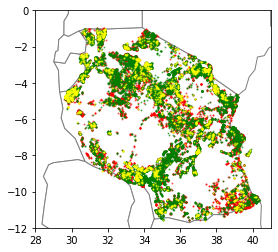

In [124]:
df = train_df   #For visualizing results storing the DataFrame 

import geopandas

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

functional = gdf.where(gdf['status_group'] == 'functional')
repair = gdf.where(gdf['status_group'] == 'functional needs repair')
broken = gdf.where(gdf['status_group'] == 'non functional')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='gray')

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=1)

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=1)

ax.scatter(repair['longitude'], repair['latitude'],
           c='yellow', alpha=.5, s=1)



plt.ylim(-12, 0)
plt.xlim(28,41)

plt.show()

# Important Observation

There are 44550 pumps, 41 columns

Out of them 39 are features and the first column is the pump id with which we will associate the output prediction.

### Labels :
The labels are under the column "status_group" and are one of the three following values:

--> functional - the waterpoint is operational and there are no repairs needed
--> functional needs repair - the waterpoint is operational, but needs repairs
--> non functional - the waterpoint is not operational
It is a categorical labelled column

### Categorical Features :
We have the following categorical variables:

* funder - Who funded the well, this has null values maybe all funders were not named.
* installer - Organization that installed the well, this has null values
* wpt_name - Name of the waterpoint if there is one
* basin - Geographic water basin
* subvillage - Geographic location, this has null values
* region - Geographic location
* recorded_by - Group entering this row of data, it seems to be same company (as it has only 1 unique value) so this column would be eliminated
* public_meeting (True/False), this has null values
* permit (True/False) - If the waterpoint is permitted, this has null values
* scheme_management - Who operates the waterpoint, this has null values
* scheme_name - Who operates the waterpoint, this has null values
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* quantity - The quantity of water (dry, enough, insufficient, seasonal, unknown)
* quantity_group - The quantity of the water
* lga - Geographic location
* ward - Geographic location
* date_recorded - The date the row was entered
### Continuous Features:
We have four quantitative features:

* amount_tsh - Total static head (amount of water available to waterpoint)
* gps_height - Altitude of the well
* longitude - GPS coordinate
* lattitude - GPS coordinate
* num_private - no avaiable information (maybe can be eliminated)
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* population - Population around the well
* construction_year- Year the waterpoint was constructed
So we have

1 column - id
30 columns of categorical variables
9 columns of continuous variables
1 column - status_group - labels
Hence 41 columns variables are mapped...

Also it is seen that there are a number of features that are mapped to a "_group" column which lead to redundancies. So we can delete one of these columns for a particular type of feature.

# 2. Variable transformation, feature engineering, feature selection or elimination.

It has been observed that population, gps_height and amount_tsh data has many 0 values. However these variables can't have 0 value. That means data wasn't recorded for those indices. Therefore, we are replacing these values with NaN. Later we gonna replace NaN with mean or median data.

In [125]:
# Replacing 0 with NaN
train_df['gps_height'].replace(0.0, np.nan, inplace=True)
train_df['population'].replace(0.0, np.nan, inplace=True)
train_df['amount_tsh'].replace(0.0, np.nan, inplace=True)
train_df.isnull().sum()

id                           0
amount_tsh               31231
date_recorded                0
funder                    2793
gps_height               15441
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               16150
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [126]:
test_df['gps_height'].replace(0.0, np.nan, inplace=True)
test_df['population'].replace(0.0, np.nan, inplace=True)
test_df['amount_tsh'].replace(0.0, np.nan, inplace=True)
test_df.isnull().sum()

Unnamed: 0                   0
id                           0
amount_tsh               10408
date_recorded                0
funder                     842
gps_height                4997
installer                  848
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                  84
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                5231
public_meeting             843
recorded_by                  0
scheme_management         1045
scheme_name               7056
permit                     720
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [127]:
# Tranforming nan to mean and median data
train_df["gps_height"].fillna(train_df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
train_df["gps_height"].fillna(train_df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
train_df["gps_height"].fillna(train_df["gps_height"].mean(), inplace=True)
train_df["population"].fillna(train_df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
train_df["population"].fillna(train_df.groupby(['region'])["population"].transform("median"), inplace=True)
train_df["population"].fillna(train_df["population"].median(), inplace=True)
train_df["amount_tsh"].fillna(train_df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
train_df["amount_tsh"].fillna(train_df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
train_df["amount_tsh"].fillna(train_df["amount_tsh"].median(), inplace=True)
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [128]:
test_df["gps_height"].fillna(test_df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
test_df["gps_height"].fillna(test_df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
test_df["gps_height"].fillna(test_df["gps_height"].mean(), inplace=True)
test_df["population"].fillna(test_df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
test_df["population"].fillna(test_df.groupby(['region'])["population"].transform("median"), inplace=True)
test_df["population"].fillna(test_df["population"].median(), inplace=True)
test_df["amount_tsh"].fillna(test_df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
test_df["amount_tsh"].fillna(test_df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
test_df["amount_tsh"].fillna(test_df["amount_tsh"].median(), inplace=True)
test_df.isnull().sum()

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

**Checking for the range of latitude and longitude**

In [129]:
print(train_df.latitude.max()-train_df.latitude.min())
print(train_df.longitude.max()-train_df.longitude.min())

11.648377570000001
40.34519307


In [130]:
print(test_df.latitude.max()-test_df.latitude.min())
print(test_df.longitude.max()-test_df.longitude.min())

11.64944016
40.34430089


**Observations**
* We see that for both training and testing dataset range of latitude and longitude is almost same and hence both training and testing data set is taken from same region 

**Transforming the numerical data**

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
train_df[features] = scaler.fit_transform(train_df[features])
train_df[features].head(20)
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [133]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
test_df[features] = scaler.fit_transform(test_df[features])
test_df[features].head(20)
test_df.isnull().sum()

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

**Further Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64

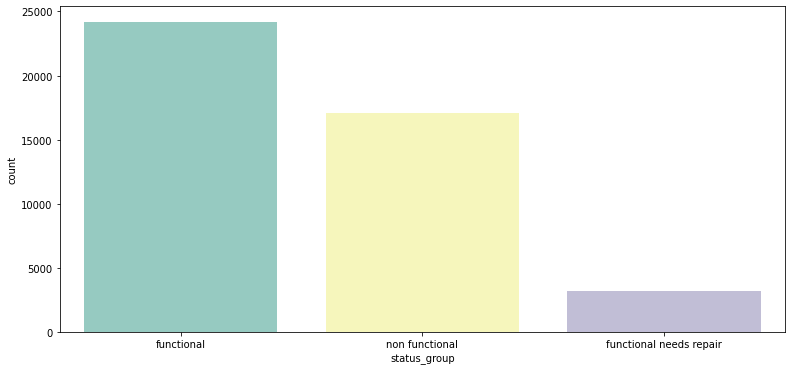

In [134]:
plt.figure(figsize=(13,6))
sns.countplot(train_df.status_group, palette = 'Set3')
train_df.status_group.value_counts()

soft                  38093
salty                  3668
unknown                1397
milky                   606
coloured                364
salty abandoned         264
fluoride                147
fluoride abandoned       11
Name: water_quality, dtype: int64

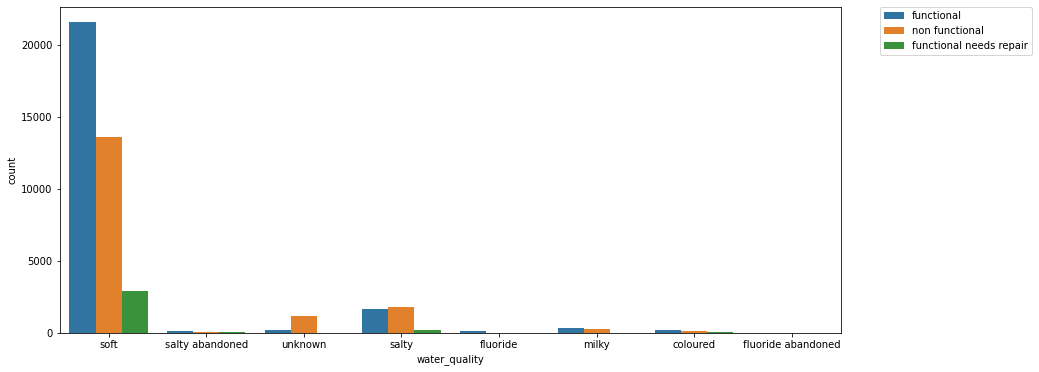

In [135]:
plt.figure(figsize=(14,6))
sns.countplot(data=train_df,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train_df.water_quality.value_counts()

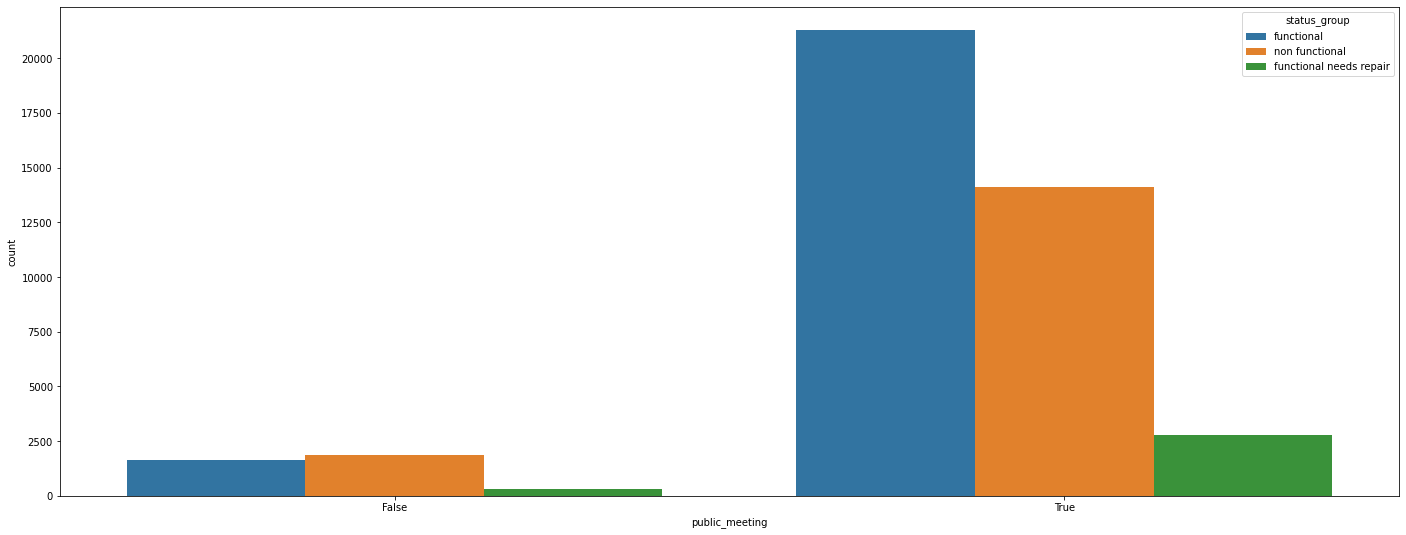

In [136]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_df,x='public_meeting',hue='status_group')

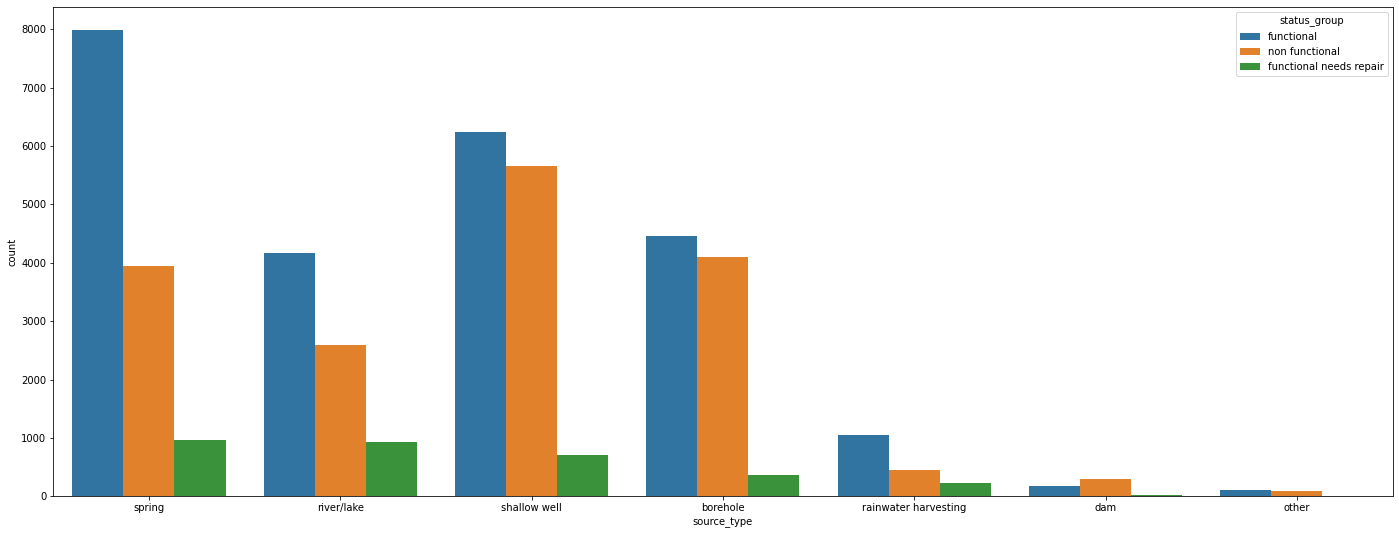

In [137]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_df,x='source_type',hue='status_group')

**We are Continuing the same approach for longitude and latitude which we did earier i.e. replacing 0 with NaN and later tranforming the NaN to mean and median.**

In [138]:
train_df['longitude'].replace(0.0, np.nan, inplace=True)
train_df['latitude'].replace(0.0, np.nan, inplace=True)
train_df['construction_year'].replace(0.0, np.nan, inplace=True)

In [139]:
test_df['longitude'].replace(0.0, np.nan, inplace=True)
test_df['latitude'].replace(0.0, np.nan, inplace=True)
test_df['construction_year'].replace(0.0, np.nan, inplace=True)

In [140]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14850 non-null  int64  
 1   id                     14850 non-null  int64  
 2   amount_tsh             14850 non-null  float64
 3   date_recorded          14850 non-null  object 
 4   funder                 14008 non-null  object 
 5   gps_height             14850 non-null  float64
 6   installer              14002 non-null  object 
 7   longitude              14392 non-null  float64
 8   latitude               14850 non-null  float64
 9   wpt_name               14850 non-null  object 
 10  num_private            14850 non-null  int64  
 11  basin                  14850 non-null  object 
 12  subvillage             14766 non-null  object 
 13  region                 14850 non-null  object 
 14  region_code            14850 non-null  int64  
 15  di

In [141]:
print(train_df.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                 1354
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year        15641
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [142]:
print(test_df.isnull().sum())

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                 458
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year        5068
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

In [143]:
train_df["latitude"].fillna(train_df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
train_df["longitude"].fillna(train_df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
train_df["longitude"].fillna(train_df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
train_df["construction_year"].fillna(train_df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
train_df["construction_year"].fillna(train_df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
train_df["construction_year"].fillna(train_df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
train_df["construction_year"].fillna(train_df["construction_year"].median(), inplace=True)
print(train_df.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [144]:
test_df["latitude"].fillna(test_df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
test_df["longitude"].fillna(test_df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
test_df["longitude"].fillna(test_df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df["construction_year"].median(), inplace=True)
print(test_df.isnull().sum())

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

**Checking for AGE of pumps** 
* If water point is old, it is highly likely to be non functional or needs repair.
* New features were created namely number of years water point is operational.

In [145]:
print(train_df.date_recorded.head(5))
print(train_df.construction_year.head(5))

0    2013-03-20
1    2011-02-21
2    2013-01-04
3    2011-04-03
4    2013-03-08
Name: date_recorded, dtype: object
0    2008.0
1    1984.0
2    2002.0
3    2000.0
4    2007.0
Name: construction_year, dtype: float64


In [146]:
print(test_df.date_recorded.head(5))
print(test_df.construction_year.head(5))

0    2011-02-25
1    2011-04-17
2    2011-03-27
3    2011-07-14
4    2011-07-31
Name: date_recorded, dtype: object
0    2004.0
1    1999.0
2    1999.0
3    1999.0
4    1999.0
Name: construction_year, dtype: float64


In [147]:
train_df.isnull().sum()
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])
train_df.date_recorded.head(5)
print(train_df.date_recorded.dt.year.head(5))
print(train_df.construction_year.head(5))
train_df['operational_year'] = train_df.date_recorded.dt.year - train_df.construction_year
train_df.operational_year.head(5)

0    2013
1    2011
2    2013
3    2011
4    2013
Name: date_recorded, dtype: int64
0    2008.0
1    1984.0
2    2002.0
3    2000.0
4    2007.0
Name: construction_year, dtype: float64


0     5.0
1    27.0
2    11.0
3    11.0
4     6.0
Name: operational_year, dtype: float64

In [148]:
test_df.isnull().sum()
test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])
test_df.date_recorded.head(5)
print(test_df.date_recorded.dt.year.head(5))
print(test_df.construction_year.head(5))
test_df['operational_year'] = test_df.date_recorded.dt.year - test_df.construction_year
test_df.operational_year.head(5)

0    2011
1    2011
2    2011
3    2011
4    2011
Name: date_recorded, dtype: int64
0    2004.0
1    1999.0
2    1999.0
3    1999.0
4    1999.0
Name: construction_year, dtype: float64


0     7.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: operational_year, dtype: float64

**DATA Cleaning**

Our approach is going to be 
* We gonna group same type of features one by one and will drop the less important columns


In [149]:
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
train_df.drop(waste_features,axis=1,inplace=True)
print(train_df.groupby(['management', 'management_group']).size() )
train_df.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial            512
other             other                 622
other - school    other                  70
parastatal        parastatal           1347
private operator  commercial           1485
trust             commercial             62
unknown           unknown               402
vwc               user-group          30371
water authority   commercial            677
water board       user-group           2221
wua               user-group           1907
wug               user-group           4874
dtype: int64


In [150]:
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
test_df.drop(waste_features,axis=1,inplace=True)
print(test_df.groupby(['management', 'management_group']).size() )
test_df.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial            173
other             other                 222
other - school    other                  29
parastatal        parastatal            421
private operator  commercial            486
trust             commercial             16
unknown           unknown               159
vwc               user-group          10136
water authority   commercial            227
water board       user-group            712
wua               user-group            628
wug               user-group           1641
dtype: int64


**Since Management and Management Group represent the same thing so we are going to drop Management_group.**

**Continuing the same Procedure for extraction_type_group and extraction_type**

In [151]:
print(train_df.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()   )   
train_df.drop('extraction_type_group',axis=1,inplace=True)

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1339
gravity                gravity                gravity                      20127
india mark ii          handpump               india mark ii                 1768
india mark iii         handpump               india mark iii                  77
mono                   motorpump              mono                          2164
nira/tanira            handpump               nira/tanira                   6130
other                  other                  other                         4768
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               65
                                              other - swn 81                 177
                                              walimi                          39
other motorpump        motorpump     

In [152]:
print(test_df.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()   )   
test_df.drop('extraction_type_group',axis=1,inplace=True)

extraction_type_group  extraction_type_class  extraction_type  
afridev                handpump               afridev               431
gravity                gravity                gravity              6653
india mark ii          handpump               india mark ii         632
india mark iii         handpump               india mark iii         21
mono                   motorpump              mono                  701
nira/tanira            handpump               nira/tanira          2024
other                  other                  other                1662
other handpump         handpump               other - play pump      20
                                              other - swn 81         52
                                              walimi                  9
other motorpump        motorpump              cemo                   20
                                              climax                  6
rope pump              rope pump              other - rope pump     116


In [153]:
train_df.drop('extraction_type_class',axis=1,inplace=True)
test_df.drop('extraction_type_class',axis=1,inplace=True)

**We are going to drop extraction_type_group and extraction_type_class**

**Continuing Same approach for scheme_management and scheme_name**

In [154]:
train_df.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name              
Company            BFFS                           1
                   Bagamoyo Wate                 47
                   Bagamoyo wate                152
                   Borehole                       1
                   Borehole drilling project      1
                                               ... 
Water authority    World Vision                   6
                   Yongoma                       14
                   Zepalama                       3
                   no scheme                      7
                   pump                           2
Length: 2831, dtype: int64

In [155]:
train_df.drop('scheme_name',axis=1,inplace=True)
test_df.drop('scheme_name',axis=1,inplace=True)

**We are going to drop scheme_name**

In [156]:
train_df.drop('payment',axis=1,inplace=True)
test_df.drop('payment',axis=1,inplace=True)

**We are also going to drop payment since it is not very important** 

**Applying same approach for water_quality and quality_group**

In [157]:
train_df.groupby(['water_quality', 'quality_group']).size()
test_df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            126
fluoride            fluoride            53
fluoride abandoned  fluoride             6
milky               milky              198
salty               salty             1188
salty abandoned     salty               75
soft                good             12725
unknown             unknown            479
dtype: int64

In [158]:
train_df.drop('quality_group',axis=1,inplace=True)
test_df.drop('quality_group',axis=1,inplace=True)

**Dropping the quality_group**

In [159]:
train_df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                4725
enough        enough            24821
insufficient  insufficient      11367
seasonal      seasonal           3049
unknown       unknown             588
dtype: int64

In [160]:
test_df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry               1521
enough        enough            8365
insufficient  insufficient      3762
seasonal      seasonal          1001
unknown       unknown            201
dtype: int64

In [161]:
train_df.drop('quantity_group',axis=1,inplace=True)
test_df.drop('quantity_group',axis=1,inplace=True)

**Dropping the quantity_group**

In [162]:
test_df.groupby(['source', 'source_type', 'source_class']).size()

source                source_type           source_class
dam                   dam                   surface          167
hand dtw              borehole              groundwater      222
lake                  river/lake            surface          221
machine dbh           borehole              groundwater     2793
other                 other                 unknown           56
rainwater harvesting  rainwater harvesting  surface          556
river                 river/lake            surface         2477
shallow well          shallow well          groundwater     4206
spring                spring                groundwater     4132
unknown               other                 unknown           20
dtype: int64

In [163]:
train_df.drop('source_type',axis=1,inplace=True)
test_df.drop('source_type',axis=1,inplace=True)
train_df.drop('source_class',axis=1,inplace=True)
test_df.drop('source_class',axis=1,inplace=True)

**Dropping source_type and source_class**

In [164]:
train_df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough               90
communal standpipe           communal standpipe       21452
communal standpipe multiple  communal standpipe        4558
dam                          dam                          5
hand pump                    hand pump                13116
improved spring              improved spring            590
other                        other                     4739
dtype: int64

In [165]:
test_df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              26
communal standpipe           communal standpipe       7070
communal standpipe multiple  communal standpipe       1545
dam                          dam                         2
hand pump                    hand pump                4372
improved spring              improved spring           194
other                        other                    1641
dtype: int64

In [166]:
train_df.drop('waterpoint_type_group',axis=1,inplace=True)
test_df.drop('waterpoint_type_group',axis=1,inplace=True)

**Dropping waterpoint_type_group**

In [167]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 44550 non-null  int64         
 1   amount_tsh         44550 non-null  float64       
 2   date_recorded      44550 non-null  datetime64[ns]
 3   funder             41757 non-null  object        
 4   gps_height         44550 non-null  float64       
 5   installer          41743 non-null  object        
 6   longitude          44550 non-null  float64       
 7   latitude           44550 non-null  float64       
 8   basin              44550 non-null  object        
 9   region             44550 non-null  object        
 10  district_code      44550 non-null  int64         
 11  lga                44550 non-null  object        
 12  ward               44550 non-null  object        
 13  population         44550 non-null  float64       
 14  public

In [168]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         14850 non-null  int64         
 1   id                 14850 non-null  int64         
 2   amount_tsh         14850 non-null  float64       
 3   date_recorded      14850 non-null  datetime64[ns]
 4   funder             14008 non-null  object        
 5   gps_height         14850 non-null  float64       
 6   installer          14002 non-null  object        
 7   longitude          14850 non-null  float64       
 8   latitude           14850 non-null  float64       
 9   basin              14850 non-null  object        
 10  region             14850 non-null  object        
 11  district_code      14850 non-null  int64         
 12  lga                14850 non-null  object        
 13  ward               14850 non-null  object        
 14  popula

In [169]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,geometry,operational_year
0,7411,0.000800,2013-03-20,Germany Republi,9.041958,CES,37.228664,-3.256505,Pangani,Kilimanjaro,5,Hai,Machame Kaskazini,0.058363,True,Water Board,True,2008.0,gravity,water board,per bucket,soft,enough,spring,communal standpipe,functional,POINT (37.22866 -3.25650),5.0
1,18014,0.117624,2011-02-21,Cdtf,10.482517,CDTF,34.615481,-9.972601,Lake Nyasa,Iringa,5,Ludewa,Luana,0.045247,False,Private operator,False,1984.0,gravity,private operator,never pay,soft,enough,spring,communal standpipe,functional,POINT (34.61548 -9.97260),27.0
2,26103,0.005859,2013-01-04,Government Of Tanzania,11.622378,DWE,36.658778,-3.321529,Pangani,Arusha,2,Arusha Rural,Kimnyaki,0.097708,True,VWC,True,2002.0,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,non functional,POINT (36.65878 -3.32153),11.0
3,31140,0.029388,2011-04-03,District Council,8.023439,District Council,33.628025,-8.860795,Rufiji,Mbeya,2,Mbeya Rural,Inyala,0.130496,True,VWC,True,2000.0,gravity,wug,annually,soft,insufficient,river,communal standpipe,functional,POINT (33.62802 -8.86080),11.0
4,12286,0.035271,2013-03-08,District Council,9.601399,District Council,37.655509,-3.669777,Pangani,Kilimanjaro,2,Mwanga,Shinghatini,0.021640,True,VWC,False,2007.0,gravity,vwc,monthly,soft,insufficient,spring,communal standpipe,functional,POINT (37.65551 -3.66978),6.0


In [170]:
train_df.drop('geometry', axis=1, inplace=True )

**Dropping the geometry as it was for visualization of data points**

In [171]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 44550 non-null  int64         
 1   amount_tsh         44550 non-null  float64       
 2   date_recorded      44550 non-null  datetime64[ns]
 3   funder             41757 non-null  object        
 4   gps_height         44550 non-null  float64       
 5   installer          41743 non-null  object        
 6   longitude          44550 non-null  float64       
 7   latitude           44550 non-null  float64       
 8   basin              44550 non-null  object        
 9   region             44550 non-null  object        
 10  district_code      44550 non-null  int64         
 11  lga                44550 non-null  object        
 12  ward               44550 non-null  object        
 13  population         44550 non-null  float64       
 14  public

In [172]:
print(train_df.groupby(['lga', 'ward','status_group']).size() )
#print(data.groupby(['lga', 'ward']).size() 

lga           ward     status_group           
Arusha Rural  Bangata  functional                 16
                       functional needs repair     2
                       non functional              9
              Bwawani  functional                  9
                       non functional             18
                                                  ..
Uyui          Ufuluma  non functional              8
              Upuge    functional                  5
                       non functional              8
              Usagali  functional                  7
                       non functional             12
Length: 4868, dtype: int64


In [173]:
train_df.drop('ward',axis=1,inplace=True)
test_df.drop('ward',axis=1,inplace=True)
train_df.drop('installer',axis=1,inplace=True)
test_df.drop('installer',axis=1,inplace=True)
train_df.drop('public_meeting', axis=1, inplace=True)
train_df.drop('permit', axis=1, inplace=True)
test_df.drop('public_meeting', axis=1, inplace=True)
test_df.drop('permit', axis=1, inplace=True)

**We are also going to drop ward, installer, public_meeting, permit**

**For every categorical response, convert the levels to lower case, in case there is random capitalization**

In [174]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization
train_df.waterpoint_type = train_df.waterpoint_type.str.lower()
train_df.funder = train_df.funder.str.lower()
train_df.basin =train_df.basin.str.lower()
train_df.region =train_df.region.str.lower()
train_df.source = train_df.source.str.lower()
train_df.lga =train_df.lga.str.lower()
train_df.management = train_df.management.str.lower()
train_df.quantity = train_df.quantity.str.lower()
train_df.water_quality = train_df.water_quality.str.lower()
train_df.payment_type=train_df.payment_type.str.lower()
train_df.extraction_type=train_df.extraction_type.str.lower()

In [175]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization
test_df.waterpoint_type = test_df.waterpoint_type.str.lower()
test_df.funder = test_df.funder.str.lower()
test_df.basin =test_df.basin.str.lower()
test_df.region = test_df.region.str.lower()
test_df.source = test_df.source.str.lower()
test_df.lga = test_df.lga.str.lower()
test_df.management = test_df.management.str.lower()
test_df.quantity =test_df.quantity.str.lower()
test_df.water_quality = test_df.water_quality.str.lower()
test_df.payment_type=test_df.payment_type.str.lower()
test_df.extraction_type=test_df.extraction_type.str.lower()

**Since we made a new column operational_year so we gonna drop date_recorded and construction_year**

**After cleaning the data we will download the clean training and testing data in a seperate file**

In [176]:
train_df["funder"].fillna("other", inplace=True)
train_df["scheme_management"].fillna("other", inplace=True)
print(train_df.isnull().sum())
train_df.drop('date_recorded', axis=1, inplace=True)
train_df.drop('construction_year', axis=1, inplace=True)
train_df.info()
train_df.quantity.head(5)
pd.DataFrame(train_df.to_csv("clean.csv"))

id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
construction_year    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
operational_year     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 44550 non-null  int64  
 1   amount_tsh         44550 non-null  float64
 2   funder             44550 non-null  object 
 3   gps_height         44550 non-null  float64
 4   longitude          44550 non-null  float64
 5   latitude

""


In [177]:
test_df["funder"].fillna("other", inplace=True)
test_df["scheme_management"].fillna("other", inplace=True)
print(test_df.isnull().sum())
test_df.drop('date_recorded', axis=1, inplace=True)
test_df.drop('construction_year', axis=1, inplace=True)
test_df.info()
test_df.quantity.head(5)
pd.DataFrame(test_df).to_csv("clean_test.csv")

Unnamed: 0           0
id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
construction_year    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
operational_year     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14850 non-null  int64  
 1   id                 14850 non-null  int64  
 2   amount_tsh         14850 non-null  float64
 3   funder             14850 non-null  object 
 4   gps_height         14850 non-null  float64
 5   longitud

In [178]:
train = pd.read_csv('clean.csv')
test = pd.read_csv('clean_test.csv')

In [179]:
# Training data set after cleaning
train.head()

,Unnamed: 0,id,amount_tsh,funder,gps_height,longitude,latitude,basin,region,district_code,lga,population,scheme_management,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,operational_year
0,0,7411,0.000800,germany republi,9.041958,37.228664,-3.256505,pangani,kilimanjaro,5,hai,0.058363,Water Board,gravity,water board,per bucket,soft,enough,spring,communal standpipe,functional,5.0
1,1,18014,0.117624,cdtf,10.482517,34.615481,-9.972601,lake nyasa,iringa,5,ludewa,0.045247,Private operator,gravity,private operator,never pay,soft,enough,spring,communal standpipe,functional,27.0
2,2,26103,0.005859,government of tanzania,11.622378,36.658778,-3.321529,pangani,arusha,2,arusha rural,0.097708,VWC,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,non functional,11.0
3,3,31140,0.029388,district council,8.023439,33.628025,-8.860795,rufiji,mbeya,2,mbeya rural,0.130496,VWC,gravity,wug,annually,soft,insufficient,river,communal standpipe,functional,11.0
4,4,12286,0.035271,district council,9.601399,37.655509,-3.669777,pangani,kilimanjaro,2,mwanga,0.021640,VWC,gravity,vwc,monthly,soft,insufficient,spring,communal standpipe,functional,6.0


In [180]:
test.head()

,Unnamed: 0,Unnamed: 0.1,id,amount_tsh,funder,gps_height,longitude,latitude,basin,region,district_code,lga,population,scheme_management,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,operational_year
0,0,0,21215,0.114274,kuamu,12.992155,35.247289,-8.113243,rufiji,iringa,1,iringa rural,1.536154,VWC,gravity,vwc,never pay,soft,dry,spring,communal standpipe,7.0
1,1,1,25893,0.014274,kirde,8.376026,36.163435,-5.218454,wami / ruvu,dodoma,1,kondoa,0.398040,VWC,mono,vwc,never pay,soft,enough,machine dbh,communal standpipe,12.0
2,2,2,15713,0.014274,water,8.376026,36.363337,-7.297600,rufiji,dodoma,1,mpwapwa,0.398040,VWC,nira/tanira,vwc,never pay,soft,enough,shallow well,hand pump,12.0
3,3,3,17247,0.014274,ka,8.376026,31.496315,-2.167140,lake victoria,kagera,3,muleba,0.398040,VWC,other,vwc,never pay,soft,enough,shallow well,hand pump,12.0
4,4,4,1248,0.014274,world vision,8.376026,31.843905,-1.244841,lake victoria,kagera,2,bukoba rural,0.398040,VWC,gravity,vwc,never pay,soft,insufficient,rainwater harvesting,communal standpipe,12.0


**It was observed that there are new column formed named Unnmed:0 and Unnamed:0.1 so we are going to drop them**

In [181]:
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)
target=train.pop('status_group')

In [182]:
test.drop('Unnamed: 0.1', axis=1, inplace=True)

**With This our data cleaning is over and finally we are left with 20 features**

In [183]:
test.shape, train.shape,target.shape

((14850, 20), (44550, 20), (44550,))

In [184]:
target.head()

0        functional
1        functional
2    non functional
3        functional
4        functional
Name: status_group, dtype: object

In [185]:
train['train']=1
test['train']=0
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 44550 non-null  int64  
 1   amount_tsh         44550 non-null  float64
 2   funder             44550 non-null  object 
 3   gps_height         44550 non-null  float64
 4   longitude          44550 non-null  float64
 5   latitude           44550 non-null  float64
 6   basin              44550 non-null  object 
 7   region             44550 non-null  object 
 8   district_code      44550 non-null  int64  
 9   lga                44550 non-null  object 
 10  population         44550 non-null  float64
 11  scheme_management  44550 non-null  object 
 12  extraction_type    44550 non-null  object 
 13  management         44550 non-null  object 
 14  payment_type       44550 non-null  object 
 15  water_quality      44550 non-null  object 
 16  quantity           445

In [186]:
combined = pd.concat([train, test])

In [187]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  float64
 4   longitude          59400 non-null  float64
 5   latitude           59400 non-null  float64
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   district_code      59400 non-null  int64  
 9   lga                59400 non-null  object 
 10  population         59400 non-null  float64
 11  scheme_management  59400 non-null  object 
 12  extraction_type    59400 non-null  object 
 13  management         59400 non-null  object 
 14  payment_type       59400 non-null  object 
 15  water_quality      59400 non-null  object 
 16  quantity           594

### Tacking of Catagorial Data

* We use pd.factorize to tackle catagorial data.
* It Encodes the object as an enumerated type

In [188]:
combined['funder'] = pd.factorize(combined['funder'])[0]
combined['scheme_management'] = pd.factorize(combined['scheme_management'])[0]
combined['extraction_type'] = pd.factorize(combined['extraction_type'])[0]
combined['management'] = pd.factorize(combined['management'])[0]
combined['payment_type'] = pd.factorize(combined['payment_type'])[0]
combined['water_quality'] = pd.factorize(combined['water_quality'])[0]
combined['quantity'] = pd.factorize(combined['quantity'])[0]
combined['source'] = pd.factorize(combined['source'])[0]
combined['waterpoint_type'] = pd.factorize(combined['waterpoint_type'])[0]
combined['basin'] = pd.factorize(combined['basin'])[0]
combined['region'] = pd.factorize(combined['region'])[0]
combined['lga'] = pd.factorize(combined['lga'])[0]
combined['district_code'] = pd.factorize(combined['district_code'])[0]
combined['operational_year'] = pd.factorize(combined['operational_year'])[0]
combined.district_code.head(5)

0    0
1    0
2    1
3    1
4    1
Name: district_code, dtype: int64

### Observation
After Cleaning the data we are left with 19 input features those are 
* amount_tsh
* funder
* gps_height
* latitude
* longitude
* basin
* region
* district_code
* lga
* population
* scheme_management
* extraction_type
* Management
* Payment type
* water_quality
* quantity
* source
* waterpoint_type
* operational_year

# 3. Declaration of 1st ML framework


In [189]:
train_df = combined[combined["train"] == 1]
test_df = combined[combined["train"] == 0]

In [190]:
train_df.drop(["train"], axis=1, inplace=True)
train_df.drop(['id'],axis=1, inplace=True)
test_df.drop(["train"], axis=1, inplace=True)
test_df.drop(['id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [191]:
#define X train
X = train_df
#y_train indentified at the beginning 
y = target

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import time

**We Choose Random Forest Classifier as our 1st ML framework because**
* It works well on high number data sets.
* It also works good with multiclass classification
* We also going to use cross validation on training dataset and look for accuracy score.

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Random Forest Classifier

**Cross Validation Score**

In [194]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=1000)
from sklearn.model_selection import cross_val_score
k = cross_val_score(model_rfc, X, y, cv=5,scoring='accuracy')
print(k)
np.mean(k)

[0.80112233 0.79124579 0.79416386 0.80572391 0.8020202 ]


0.7988552188552188

**Hyper Parameter Tuning for random Forest**

In [195]:
scoring='accuracy'
rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[10,20], 'n_estimators':[100,500,1000]}
clf_rfc = GridSearchCV(rfc, param_grid=hyperparameters, scoring=scoring)
clf_rfc.fit(X_train,y_train)
print('Best Parameters: ')
print(clf_rfc.best_params_)
print('Best ' + scoring + ':' + str(clf_rfc.best_score_))

Best Parameters: 
{'max_depth': 20, 'n_estimators': 500}
Best accuracy:0.7996632996632996


In [196]:
y_pred_test = clf_rfc.predict(X_test);
y_pred = clf_rfc.predict(X_train)
print(classification_report(y_test,y_pred_test ))

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test,y_pred_test )}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test,y_pred_test )}")

                         precision    recall  f1-score   support

             functional       0.80      0.89      0.84      4884
functional needs repair       0.58      0.31      0.40       654
         non functional       0.83      0.77      0.80      3372

               accuracy                           0.80      8910
              macro avg       0.74      0.66      0.68      8910
           weighted avg       0.80      0.80      0.79      8910

Accuracy:
TRAIN: 0.9693883277216611
TEST: 0.8019079685746352

Balanced Accuracy:
TRAIN: 0.9317210614657089
TEST: 0.6562011786064156


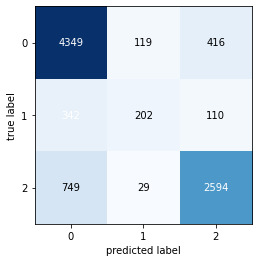

In [197]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

**The results for the train and test analysis show that they are overfitting, maybe by further hyperparameter tunning this can be resolved.**

# 5. Relative Order of Importance of Features for Random Forest Classifier

In [201]:
importances = clf_rfc.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. "%(f+1) + str(X.columns[indices[f]]) + " %d (%f)" % (indices[f], importances[indices[f]]))

Feature ranking:
1. quantity 15 (0.130063)
2. longitude 3 (0.126430)
3. latitude 4 (0.122560)
4. gps_height 2 (0.073686)
5. waterpoint_type 17 (0.073154)
6. operational_year 18 (0.060307)
7. funder 1 (0.056736)
8. extraction_type 11 (0.051623)
9. population 9 (0.051621)
10. payment_type 13 (0.037968)
11. lga 8 (0.034178)
12. source 16 (0.031771)
13. amount_tsh 0 (0.028187)
14. region 6 (0.024975)
15. district_code 7 (0.023949)
16. management 12 (0.021095)
17. scheme_management 10 (0.020377)
18. basin 5 (0.017880)
19. water_quality 14 (0.013439)


**Checking Results after dropping the least important features**

In [199]:
X_train_2=X_train.copy()
X_test_2=X_test.copy()
X_train_2.drop('water_quality',axis=1,inplace=True)
X_test_2.drop('water_quality',axis=1,inplace=True)
X_train_2.drop('scheme_management',axis=1,inplace=True)
X_test_2.drop('scheme_management',axis=1,inplace=True)
X_train_2.drop('basin',axis=1,inplace=True)
X_test_2.drop('basin',axis=1,inplace=True)

In [202]:
clf_rfc.fit(X_train_2,y_train)
y_pred_test = clf_rfc.predict(X_test_2);
y_pred = clf_rfc.predict(X_train_2)
print(classification_report(y_test,y_pred_test ))

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test,y_pred_test )}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test,y_pred_test )}")

                         precision    recall  f1-score   support

             functional       0.80      0.89      0.84      4884
functional needs repair       0.59      0.31      0.41       654
         non functional       0.83      0.77      0.80      3372

               accuracy                           0.80      8910
              macro avg       0.74      0.66      0.68      8910
           weighted avg       0.79      0.80      0.79      8910

Accuracy:
TRAIN: 0.971324354657688
TEST: 0.8006734006734006

Balanced Accuracy:
TRAIN: 0.9360478895590756
TEST: 0.6563768876038294


**It was observed that dropping these parameters only increase accuracy score a little.**

In [203]:
test_df_rfc = test_df

In [204]:
test_df_rfc.drop('basin',axis=1,inplace=True)
test_df_rfc.drop('scheme_management',axis=1,inplace=True)
test_df_rfc.drop('water_quality',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [205]:
X_test_rfc=test_df_rfc

### 7. Making Predictions and download the labels for test dataset for Random Forest Classifier.

In [206]:
y_pred_rfc = clf_rfc.predict(X_test_rfc)
y_pred_rfc = pd.DataFrame(y_pred_rfc)
y_pred_rfc.columns = ['status_group']
y_pred_rfc = y_pred_rfc[['status_group']]
y_pred_rfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  14850 non-null  object
dtypes: object(1)
memory usage: 116.1+ KB


In [207]:
pd.DataFrame(y_pred_rfc).to_csv("RFC_predicted_output.csv")

# 4. Diligent hyperparameter tuning for three other frameworks.

We choose 
* XGB Classifier
* Ridge Classifier 
* K- Nearest Neighbors(KNN) 

For All 3 models we did cross validation, hyperparameters tuning and Downloaded the test output labels and we also determine the feature importance for XGB classifier.

### XGB Classifier

**Cross Validation**

In [208]:
from xgboost import XGBClassifier
model_xgc = XGBClassifier()
model_xgc.fit(X, y)

k2 = cross_val_score(model_xgc, X, y, cv=5,scoring='accuracy')
print(k2)
np.mean(k2)

[0.74837262 0.74320988 0.74500561 0.74433221 0.73782267]


0.7437485970819304

**Hypertuning in XGB Classifier**

In [209]:
scoring='accuracy'
xgc = XGBClassifier()
hyperparameters = {'gamma': [0,1,10], 'max_depth': [6,10]}
clf_xgc = GridSearchCV(xgc, param_grid=hyperparameters, scoring=scoring)
clf_xgc.fit(X_train,y_train)
print('Best Parameters: ')
print(clf_xgc.best_params_)
print('Best ' + scoring + ':' + str(clf_xgc.best_score_))

Best Parameters: 
{'gamma': 0, 'max_depth': 10}
Best accuracy:0.796604938271605


In [210]:
y_pred_test = clf_xgc.predict(X_test);
y_pred = clf_xgc.predict(X_train)
print(classification_report(y_test,y_pred_test ))

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test,y_pred_test )}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test,y_pred_test )}")

                         precision    recall  f1-score   support

             functional       0.79      0.90      0.84      4884
functional needs repair       0.61      0.25      0.36       654
         non functional       0.83      0.75      0.79      3372

               accuracy                           0.80      8910
              macro avg       0.74      0.64      0.66      8910
           weighted avg       0.79      0.80      0.79      8910

Accuracy:
TRAIN: 0.9014870931537599
TEST: 0.7975308641975308

Balanced Accuracy:
TRAIN: 0.7888971999960398
TEST: 0.6357068121817215


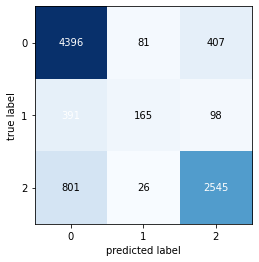

In [211]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

**Feature Importance determination for XGB Classifier**

In [212]:
importances = clf_xgc.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. "%(f+1) + str(X.columns[indices[f]]) + " %d (%f)" % (indices[f], importances[indices[f]]))

Feature ranking:
1. quantity 15 (0.275938)
2. waterpoint_type 17 (0.187618)
3. region 6 (0.052614)
4. extraction_type 11 (0.046187)
5. payment_type 13 (0.042940)
6. lga 8 (0.038917)
7. basin 5 (0.037983)
8. management 12 (0.036147)
9. source 16 (0.034018)
10. operational_year 18 (0.030051)
11. district_code 7 (0.029806)
12. scheme_management 10 (0.027091)
13. amount_tsh 0 (0.027020)
14. longitude 3 (0.025766)
15. funder 1 (0.023421)
16. latitude 4 (0.023420)
17. population 9 (0.021493)
18. water_quality 14 (0.020052)
19. gps_height 2 (0.019520)


In [213]:
X_train_3=X_train.copy()
X_test_3=X_test.copy()
X_train_3.drop('gps_height',axis=1,inplace=True)
X_test_3.drop('gps_height',axis=1,inplace=True)
X_train_3.drop('water_quality',axis=1,inplace=True)
X_test_3.drop('water_quality',axis=1,inplace=True)

In [214]:
clf_xgc.fit(X_train_3,y_train)
y_pred_test = clf_xgc.predict(X_test_3);
y_pred = clf_xgc.predict(X_train_3)
print(classification_report(y_test,y_pred_test ))

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test,y_pred_test )}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test,y_pred_test )}")

                         precision    recall  f1-score   support

             functional       0.79      0.90      0.84      4884
functional needs repair       0.66      0.25      0.37       654
         non functional       0.83      0.76      0.79      3372

               accuracy                           0.80      8910
              macro avg       0.76      0.64      0.67      8910
           weighted avg       0.80      0.80      0.79      8910

Accuracy:
TRAIN: 0.8808922558922558
TEST: 0.7996632996632996

Balanced Accuracy:
TRAIN: 0.7488221512030798
TEST: 0.6375368071064961


**Only slight increase in accuracy**

### Ridge Classifier

In [224]:
from sklearn.linear_model import RidgeClassifier as RC
from sklearn.metrics import classification_report, confusion_matrix
model_rc = RC()
model_rc.fit(X,y)

k3 = cross_val_score(model_rc, X, y, cv=5,scoring='accuracy')

In [225]:
print(k3)
np.mean(k3)

[0.62749719 0.62020202 0.61627385 0.61515152 0.62121212]


0.62006734006734

**Hypertunig for ridge Classifier**

In [226]:
scoring='accuracy'
rc = RC()
hyperparameters = {'alpha': [0.1,0.2,0.5,0.7,1.0]} # Hyperparameters we want to tune
clf_rc = GridSearchCV(rc, param_grid=hyperparameters, scoring=scoring)
clf_rc.fit(X_train,y_train)
print('Best Parameters: ')
print(clf_rc.best_params_)
print('Best ' + scoring + ':' + str(clf_rc.best_score_))

Best Parameters: 
{'alpha': 0.1}
Best accuracy:0.6203984287317621


### KNN 

In [227]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X,y)
k4 = cross_val_score(model_knn, X, y, cv=5,scoring='accuracy')

In [228]:
print(k4)
np.mean(k4)

[0.7369248  0.72716049 0.73097643 0.73344557 0.7359147 ]


0.7328843995510663

**Hypertuning for KNN**

In [229]:
scoring='accuracy'
knn = KNeighborsClassifier()
hyperparameters = {'n_neighbors': [1,3,5,10], 'leaf_size':[30,50]} # Hyper Parameters we want to tune
clf_knn = GridSearchCV(knn, param_grid=hyperparameters, scoring=scoring)
clf_knn.fit(X_train,y_train)
print('Best Parameters: ')
print(clf_knn.best_params_)
print('Best ' + scoring + ':' + str(clf_knn.best_score_))

Best Parameters: 
{'leaf_size': 30, 'n_neighbors': 3}
Best accuracy:0.7278058361391695


In [231]:
y_pred_test = clf_knn.predict(X_test);
y_pred = clf_knn.predict(X_train)
print(classification_report(y_test,y_pred_test ))

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test,y_pred_test )}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test,y_pred_test )}")

                         precision    recall  f1-score   support

             functional       0.76      0.82      0.79      4884
functional needs repair       0.47      0.30      0.37       654
         non functional       0.73      0.70      0.71      3372

               accuracy                           0.73      8910
              macro avg       0.65      0.61      0.62      8910
           weighted avg       0.73      0.73      0.73      8910

Accuracy:
TRAIN: 0.8496632996632997
TEST: 0.7344556677890012

Balanced Accuracy:
TRAIN: 0.7465433726022169
TEST: 0.6058887564486833


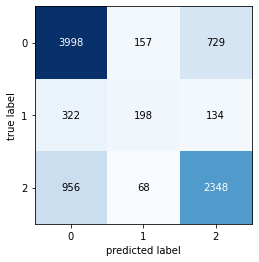

In [234]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

### **Observations**
The important observations after fitting the data is
* Random forest Classifier gives best accuracy score on validation for tranining data.
* After hyperparameter tuning accuracy score increases for all models.
* Ridge Classifier gives least accuracy score.

# 6. Visualization of decision boundaries using TSNE

In [235]:
from sklearn.manifold import TSNE
m = TSNE(n_components=2,perplexity=50)
tsne_features= m.fit_transform(train_df)

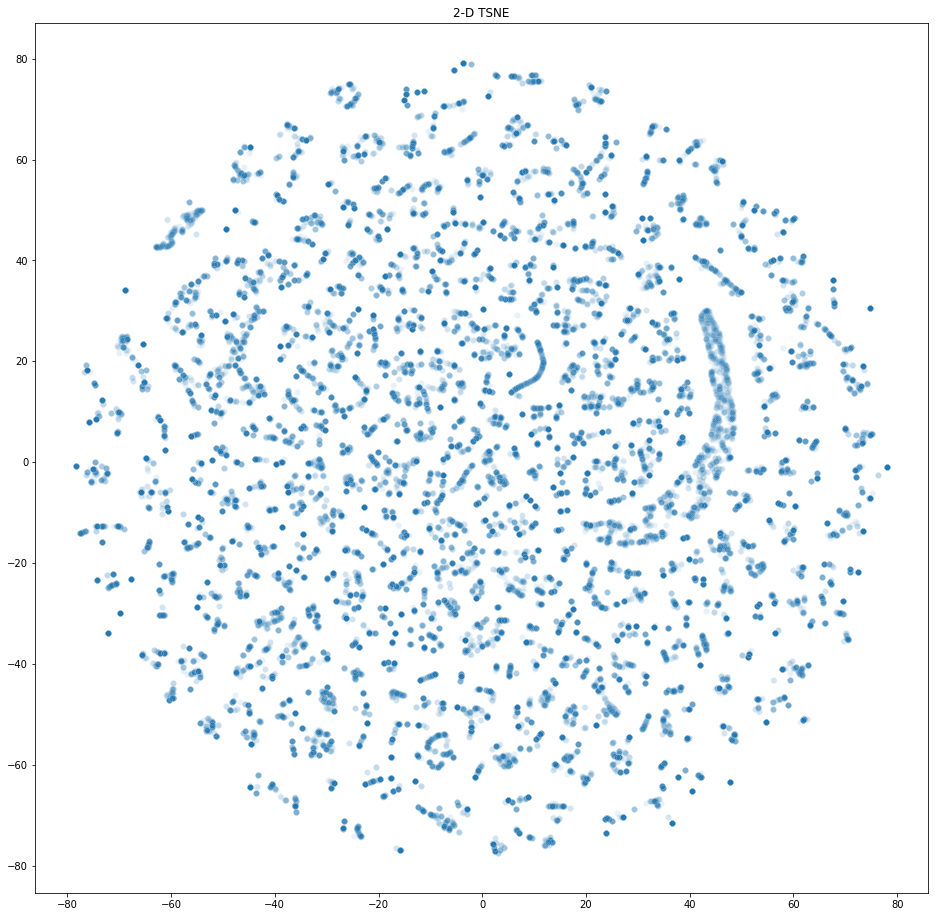

In [237]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], alpha=0.1)
plt.title('2-D TSNE')
plt.show()

Estimated number of clusters : 1027


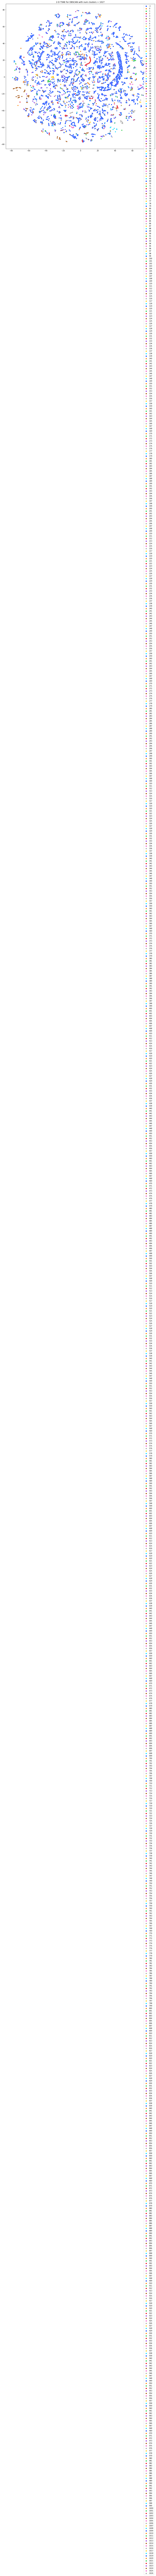

In [238]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1.5, min_samples=8).fit(train_df)
labels = clustering.labels_
unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
print('Estimated number of clusters : %d'% n_clusters_)

core_samples_mask = np.zeros_like(clustering.labels_,dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
n_noise_ = list(labels).count(-1)


plt.figure(figsize=(16,16))
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=labels, palette ='bright', alpha=0.5)
plt.title('2-D TSNE for DBSCAN with num clusters = %d' % n_clusters_)
plt.show()

In [241]:
from sklearn.cluster import KMeans
from sklearn import metrics

k_range = np.arange(2,9)
trials_per_k = 5;

total_k = k_range.shape[0]
score = np.zeros(total_k)
avg_purity = np.zeros(total_k)

for k_num in range(0,total_k):
  kmeans = KMeans(n_clusters = k_range[k_num])

  trial_score = np.zeros(trials_per_k)
  trial_purity = np.zeros(trials_per_k)

  for trial in range(0,trials_per_k):
    labels = kmeans.fit_predict(train_df)
    trial_score[trial] = metrics.davies_bouldin_score(train_df,labels)

    for label in range(0,k_range[k_num]):
      cluster_labels = y.loc[labels==label]

  score[k_num] = np.median(trial_score)
  avg_purity[k_num] = np.median(trial_purity)
  plt.figure(figsize=(16,16))
  sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=labels, palette ='bright', alpha=0.5)
  plt.title('2-D TSNE for k-Means with k = ' + str(k_range[k_num]))
  plt.show()

plt.plot(k_range,score)
plt.title('Clustering score')
plt.show()

plt.plot(k_range,avg_purity)
plt.title('Weighted average purity')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Using k-Means Clustering the classes in the 2-D reduced data are more clear.

# 8. Refrences:
1. ML for Smart Monkey Lecture
2. https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
3. https://towardsdatascience.com/t-sne-python-example-1ded9953f26
4. https://medium.com/analytics-vidhya/predictive-modeling-for-tanzanian-water-pumps-701bcc7760b2
5. https://medium.com/rapids-ai/tsne-with-gpus-hours-to-seconds-9d9c17c941db#:~:text=Scikit%2Dlearn's%20TSNE%20